In [9]:
import pandas as pd
import os
import json
import sys
from os.path import expanduser
import numpy as np

DATA_CONVERGE_PROJECT="sd2e-project-43"
DATA_CONVERGE_CORRECTNESS_DATA_PROJECT="sd2e-project-45"

data_converge_base = os.path.join(expanduser("~"), 'sd2e-projects', DATA_CONVERGE_PROJECT)
data_converge_correctness_data_base = os.path.join(expanduser("~"), 'sd2e-projects', DATA_CONVERGE_CORRECTNESS_DATA_PROJECT)


experiment_dir = os.path.realpath(os.path.join(data_converge_base, 'test'))
experiment_dir_contents = [os.path.realpath(os.path.join(experiment_dir, x)) for x in os.listdir(experiment_dir)]

experiments = [x for x in  experiment_dir_contents 
               if os.path.isdir(x) and "dc_" in x]

experiments



['/work/projects/SD2E-Community/prod/projects/sd2e-project-43/test/dc_YeastSTATES-CRISPR-Short-Duration-Time-Series-35C_20200414152048',
 '/work/projects/SD2E-Community/prod/projects/sd2e-project-43/test/dc_YeastSTATES-CRISPR-Growth-Curves-35C_20200414152809',
 '/work/projects/SD2E-Community/prod/projects/sd2e-project-43/test/dc_YeastSTATES-CRISPR-Dose-Response_20200414151033',
 '/work/projects/SD2E-Community/prod/projects/sd2e-project-43/test/dc_YeastSTATES-CRISPR-Long-Duration-Time-Series-20191208_20200414085017',
 '/work/projects/SD2E-Community/prod/projects/sd2e-project-43/test/dc_YeastSTATES-Doxycycline-OR-Gate-Plant-TF-Growth-Curves_20200414144659',
 '/work/projects/SD2E-Community/prod/projects/sd2e-project-43/test/dc_YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Growth-Curves_20200327174254',
 '/work/projects/SD2E-Community/prod/projects/sd2e-project-43/test/dc_YeastSTATES-OR-Gate-CRISPR-Growth-Curves_20200414145352',
 '/work/projects/SD2E-Community/prod/projects/sd2e-project-43/t

In [2]:
## Data Helper functions

def get_record(experiment):
    record = json.load(open(os.path.join(experiment, "record.json")))
    return record

def json_to_pd(json_data, channels=["FSC-A"]):    
    df = pd.DataFrame()
    for sample in json_data:
        sample_id = sample['sample_id']       
        sample_df = pd.DataFrame(data={ k:v for k, v in sample.items() if k != "sample_id"})        
        sample_df.loc[:,'sample_id'] = sample_id
        df = df.append(sample_df, ignore_index=True)
    return df
            
def get_record_file(record, file_type="fc_meta"):
    files = record['files']
    files_of_type = [ x for x in files if file_type in x['name']]
    if len(files_of_type) > 0:
        return files_of_type[0]
    else:
        return None

def get_meta(experiment, record):
    meta_file_name = get_record_file(record, file_type="fc_meta.csv")
    #print(meta_file_name)
    if meta_file_name:
        meta_df = pd.read_csv(os.path.join(experiment, meta_file_name['name']))
        return meta_df
    else:
        return None
    

def get_data(experiment, record):
    fc_raw_file = get_record_file(record, file_type="fc_raw_events")
    if fc_raw_file:
        fc_raw_data = json.load(open(os.path.join(experiment, fc_raw_file['name'])))
        return json_to_pd(fc_raw_data)
    else:
        return None

def get_data_and_metadata(experiment):
    record = get_record(experiment)
    data = get_data(experiment, record)
    meta = get_meta(experiment, record)
    if data is not None and meta is not None:
        df = meta.merge(data, on="sample_id", how="inner")
        return df
    else:
        return None

In [19]:
## Append the metadata for each experiment

mega_metadata = pd.DataFrame()
for experiment in experiments:
    record = get_record(experiment)
    meta = get_meta(experiment, record)
    if meta is not None:
        mega_metadata = mega_metadata.append(meta)
mega_metadata



,TX_plate_name,TX_project_name,TX_sample_name,_id,date_of_experiment,experiment_id,experiment_reference,flow_rate_uL/min,flow_volume,inducer_concentration,...,replicate,sample_id,strain,strain_name,temperature,temperature_unit,timepoint,timepoint_unit,total_counts,well_id
0,YS-TS35C-03-05-2020-T1,Sytox-YeastGates,SytoxYG-Plate,5bfd9cf289f1041e26f37d6d,05-Mar-2020,r1e6ge2n8x7q5p,YeastSTATES-CRISPR-Short-Duration-Time-Series-35C,200,60000,0.000010,...,1,sample.transcriptic.aq1e6tn3vf8w8dy.experiment...,beads_spherotech_rainbow,Inducible-CRISPR-Gate-5,35.0,celsius,18.0,hour,26513,h12
1,YS-TS35C-03-05-2020-T1,Sytox-YeastGates,SytoxYG-Plate,5bfd9cf289f1041e26f37d6d,05-Mar-2020,r1e6ge2n8x7q5p,YeastSTATES-CRISPR-Short-Duration-Time-Series-35C,200,60000,0.000200,...,1,sample.transcriptic.aq1e6tn3vf388ru.experiment...,beads_spherotech_pps_6K,Inducible-CRISPR-Gate-5,35.0,celsius,18.0,hour,6836,h11
2,YS-TS35C-03-05-2020-T2,Sytox-YeastGates,SytoxYG-Plate,5bfd9cf289f1041e26f37d6d,05-Mar-2020,r1e6ge2n8x7q5p,YeastSTATES-CRISPR-Short-Duration-Time-Series-35C,200,60000,0.000010,...,1,sample.transcriptic.aq1e6tn44zvaxpk.experiment...,beads_spherotech_rainbow,Inducible-CRISPR-Gate-5,35.0,celsius,20.0,hour,27074,h12
3,YS-TS35C-03-05-2020-T2,Sytox-YeastGates,SytoxYG-Plate,5bfd9cf289f1041e26f37d6d,05-Mar-2020,r1e6ge2n8x7q5p,YeastSTATES-CRISPR-Short-Duration-Time-Series-35C,200,60000,0.000200,...,1,sample.transcriptic.aq1e6tn44zpmy2h.experiment...,beads_spherotech_pps_6K,Inducible-CRISPR-Gate-5,35.0,celsius,20.0,hour,7575,h11
4,YS-TS35C-03-05-2020-T3,Sytox-YeastGates,SytoxYG-Plate,5bfd9cf289f1041e26f37d6d,05-Mar-2020,r1e6ge2n8x7q5p,YeastSTATES-CRISPR-Short-Duration-Time-Series-35C,200,60000,0.000010,...,1,sample.transcriptic.aq1e6tn4bkg3uzm.experiment...,beads_spherotech_rainbow,Inducible-CRISPR-Gate-5,35.0,celsius,22.0,hour,26335,h12
5,YS-TS35C-03-05-2020-T3,Sytox-YeastGates,SytoxYG-Plate,5bfd9cf289f1041e26f37d6d,05-Mar-2020,r1e6ge2n8x7q5p,YeastSTATES-CRISPR-Short-Duration-Time-Series-35C,200,60000,0.000200,...,1,sample.transcriptic.aq1e6tn4bkadvcf.experiment...,beads_spherotech_pps_6K,Inducible-CRISPR-Gate-5,35.0,celsius,22.0,hour,7274,h11
6,YS-TS35C-03-05-2020-T4,Sytox-YeastGates,SytoxYG-Plate,5bfd9cf289f1041e26f37d6d,05-Mar-2020,r1e6ge2n8x7q5p,YeastSTATES-CRISPR-Short-Duration-Time-Series-35C,200,60000,0.000010,...,1,sample.transcriptic.aq1e6tn4gnebsga.experiment...,beads_spherotech_rainbow,Inducible-CRISPR-Gate-5,35.0,celsius,24.0,hour,26407,h12
7,YS-TS35C-03-05-2020-T4,Sytox-YeastGates,SytoxYG-Plate,5bfd9cf289f1041e26f37d6d,05-Mar-2020,r1e6ge2n8x7q5p,YeastSTATES-CRISPR-Short-Duration-Time-Series-35C,200,60000,0.000200,...,1,sample.transcriptic.aq1e6tn4gn8nsu6.experiment...,beads_spherotech_pps_6K,Inducible-CRISPR-Gate-5,35.0,celsius,24.0,hour,7215,h11
8,YS-TS35C-03-05-2020-T1,Sytox-YeastGates,SytoxYG-Plate,5bfd9cf289f1041e26f37d6d,05-Mar-2020,r1e6ge2n8x7q5p,YeastSTATES-CRISPR-Short-Duration-Time-Series-35C,200,60000,0.000000,...,4,sample.transcriptic.aq1e6tn3vebha64.experiment...,UWBF_24961,BE-inducible-fluorescent-protein,35.0,celsius,18.0,hour,16506,e7
9,YS-TS35C-03-05-2020-T1,Sytox-YeastGates,SytoxYG-Plate,5bfd9cf289f1041e26f37d6d,05-Mar-2020,r1e6ge2n8x7q5p,YeastSTATES-CRISPR-Short-Duration-Time-Series-35C,200,60000,0.000060,...,10,sample.transcriptic.aq1e6tn3vdmxhpk.experiment...,UWBF_24960,Inducible-CRISPR-Gate-4,35.0,celsius,18.0,hour,18805,d3


In [51]:
## Merge in correctness data
correctness_dir = os.path.join(data_converge_correctness_data_base, 'correctness')
correctness_dir_contents = [os.path.realpath(os.path.join(correctness_dir, x)) for x in os.listdir(correctness_dir)]

mega_metadata_and_analysis = mega_metadata
for data_file in correctness_dir_contents:
    data_df = pd.read_csv(data_file, index_col=0)
    data_df.set_index("sample_id")
    mega_metadata_and_analysis.set_index("sample_id")
    mega_metadata_and_analysis = mega_metadata_and_analysis.combine_first(data_df)
    mega_metadata_and_analysis.reset_index()
mega_metadata_and_analysis

,TX_plate_name,TX_project_name,TX_sample_name,_id,date_of_experiment,experiment_id,experiment_reference,flow_rate_uL/min,flow_volume,inducer_concentration,...,std_correct_high_classifier,std_correct_low_classifier,strain,strain_name,temperature,temperature_unit,timepoint,timepoint_unit,total_counts,well_id
0,YS-TS35C-03-05-2020-T1,Sytox-YeastGates,SytoxYG-Plate,5bfd9cf289f1041e26f37d6d,05-Mar-2020,r1e6ge2n8x7q5p,YeastSTATES-CRISPR-Short-Duration-Time-Series-35C,200,60000,0.000010,...,0.091088,0.091088,beads_spherotech_rainbow,Inducible-CRISPR-Gate-5,35.0,celsius,18.0,hour,26513,h12
0,TimeSeries-11-27-2019-Run2-LowBE,Sytox-YeastGates,SytoxYG-Plate,5bfd9cf289f1041e26f37d6d,27-Nov-2019,r1dtsch56yk5pq,YeastSTATES-CRISPR-Dose-Response,100,60000,0.000010,...,0.091088,0.091088,SpheroControl1,Inducible-CRISPR-Gate-5,30.0,celsius,46.0,hour,14933,h11
0,TimeSeries-12-21-2019-Run3-Endpoint,Sytox-YeastGates,SytoxYG-Plate,5bfd9cf289f1041e26f37d6d,21-Dec-2019,r1dw4j9z5fwbcy,YeastSTATES-CRISPR-Long-Duration-Time-Series-2...,200,60000,0.000000,...,0.091088,0.091088,SpheroControl1,SpheroControl,30.0,celsius,52.0,hour,27784,f2
0,YS-TS35C-03-24-2020-R2T1,Sytox-YeastGates,SytoxYG-Plate,5bfd9cf289f1041e26f37d6d,24-Mar-2020,r1e88vf7pudjp6,YeastSTATES-Beta-Estradiol-OR-Gate-Plant-TF-Do...,200,60000,0.000400,...,0.091088,0.091088,beads_spherotech_rainbow,Inducible-CRISPR-Gate-3,35.0,celsius,18.0,hour,28699,c9
0,TimeSeries-12-21-2019-Run3-Endpoint,Sytox-YeastGates,SytoxYG-Plate,5bfd9cf289f1041e26f37d6d,21-Dec-2019,r1dw4j9z5fwbcy,YeastSTATES-CRISPR-Long-Duration-Time-Series-2...,200,60000,0.000000,...,0.091088,0.091088,SpheroControl1,SpheroControl,30.0,celsius,52.0,hour,27784,f2
0,TimeSeries-12-11-2019-Run1P1,Sytox-YeastGates,SytoxYG-Plate,5bfd9cf289f1041e26f37d6d,11-Dec-2019,r1dvbsa7n5qwxe,YeastSTATES-CRISPR-Short-Duration-Time-Series-...,200,60000,0.000000,...,0.091088,0.091088,SpheroControl,SpheroControl,30.0,celsius,18.0,hour,27,f2
0,TimeSeries-12-11-2019-Run1P1,Sytox-YeastGates,SytoxYG-Plate,5bfd9cf289f1041e26f37d6d,11-Dec-2019,r1dvbsa7n5qwxe,YeastSTATES-CRISPR-Short-Duration-Time-Series-...,200,60000,0.000000,...,0.091088,0.091088,SpheroControl,SpheroControl,30.0,celsius,18.0,hour,27,f2
0,TimeSeries-11-27-2019-Run2-LowBE,Sytox-YeastGates,SytoxYG-Plate,5bfd9cf289f1041e26f37d6d,27-Nov-2019,r1dtsch56yk5pq,YeastSTATES-CRISPR-Dose-Response,100,60000,0.000010,...,0.091088,0.091088,SpheroControl1,Inducible-CRISPR-Gate-5,30.0,celsius,46.0,hour,14933,h11
1,YS-TS35C-03-05-2020-T1,Sytox-YeastGates,SytoxYG-Plate,5bfd9cf289f1041e26f37d6d,05-Mar-2020,r1e6ge2n8x7q5p,YeastSTATES-CRISPR-Short-Duration-Time-Series-35C,200,60000,0.000200,...,0.303865,0.303865,beads_spherotech_pps_6K,Inducible-CRISPR-Gate-5,35.0,celsius,18.0,hour,6836,h11
1,TimeSeries-11-27-2019-Run2-LowBE,Sytox-YeastGates,SytoxYG-Plate,5bfd9cf289f1041e26f37d6d,27-Nov-2019,r1dtsch56yk5pq,YeastSTATES-CRISPR-Dose-Response,100,60000,0.000006,...,0.303865,0.303865,beads_spherotech_pps_6K,Inducible-CRISPR-Gate-5,30.0,celsius,46.0,hour,3975,h10


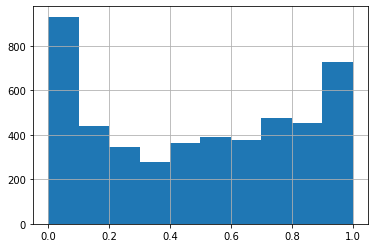

In [55]:
## Histogram of correctness for all samples.  Assumes that expected output for GFP is low.  

mega_metadata_and_analysis.mean_correct_low_classifier.hist()